![alt text](routemap.png "SQLite and Pandas quick intro")


![alt text](pandas_sqlite1_01.jpg "Quick Intro")

In [41]:
import pandas as pd
import sqlite3
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
pd.set_option("max_colwidth", 10)
pd.set_option("display.max_rows", 5)


con = sqlite3.connect("flights.db")
airdf = pd.read_sql_query("select * from airports;", con)
airdf

,index,id,name,city,country,code,icao,latitude,longitude,altitude,offset,dst,timezone
0,0,1,Goroka,Goroka,Papua ...,GKA,AYGA,-6.081689,145.39...,5282,10,U,Pacifi...
1,1,2,Madang,Madang,Papua ...,MAG,AYMD,-5.207083,145.7887,20,10,U,Pacifi...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8105,8105,9540,Deer H...,Deer H...,United...,DHB,\N,48.618397,-123.0...,0,-8,A,Americ...
8106,8106,9541,San Di...,San Diego,United...,OLT,\N,32.7552,-117.1995,0,-8,A,Americ...


![alt text](pandas_sqlite1_02.jpg "Filtering in SQL")

In [42]:
candf = pd.read_sql_query("select * from airports where country = 'Canada';", con);
candf

,index,id,name,city,country,code,icao,latitude,longitude,altitude,offset,dst,timezone
0,20,21,Sault ...,Sault ...,Canada,YAM,CYAM,46.485001,-84.50...,630,-5,A,Americ...
1,21,22,Winnip...,Winnipeg,Canada,YAV,CYAV,50.056389,-97.0325,760,-6,A,Americ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
433,8103,9538,Port M...,Port M...,Canada,YMP,\N,50.575556,-127.0...,225,-8,A,Americ...
434,8104,9539,Sulliv...,Sulliv...,Canada,YTG,\N,50.883333,-126.8...,0,-8,A,Americ...


![alt text](pandas_sqlite1_03.jpg)

In [21]:
airdf.loc[airdf.country == "Canada"]

,index,id,name,city,country,code,icao,latitude,longitude,altitude,offset,dst,timezone
20,20,21,Sault ...,Sault ...,Canada,YAM,CYAM,46.485001,-84.50...,630,-5,A,Americ...
21,21,22,Winnip...,Winnipeg,Canada,YAV,CYAV,50.056389,-97.0325,760,-6,A,Americ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8103,8103,9538,Port M...,Port M...,Canada,YMP,\N,50.575556,-127.0...,225,-8,A,Americ...
8104,8104,9539,Sulliv...,Sulliv...,Canada,YTG,\N,50.883333,-126.8...,0,-8,A,Americ...


![alt text](pandas_sqlite1_04.jpg)

In [22]:
routes = pd.read_sql_query("""
select sa.code as sacode, da.code as dacode, cast(sa.longitude as float) as source_lon,
    cast(sa.latitude as float) as source_lat,
    cast(da.longitude as float) as dest_lon,
    cast(da.latitude as float) as dest_lat
from routes
    inner join airports sa on sa.id = routes.source_id
    inner join airports da on da.id = routes.dest_id;
""",con)
routes

,sacode,dacode,source_lon,source_lat,dest_lon,dest_lat
0,AER,KZN,39.956589,43.449928,49.278728,55.606186
1,ASF,KZN,48.006278,46.283333,49.278728,55.606186
...,...,...,...,...,...,...
67200,FRU,OSS,74.477556,43.061306,72.793269,40.608989
67201,OSS,FRU,72.793269,40.608989,74.477556,43.061306


![alt text](pandas_sqlite2.jpg)

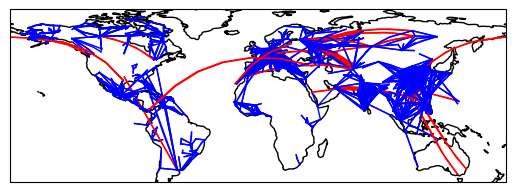

In [45]:
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()

for name, row in routes[:3000].iterrows():
    distcolor = "blue" if abs(row["source_lon"] - row["dest_lon"]) < 30  else "red"
    plt.plot([row.source_lon, row.dest_lon], [row.source_lat, row.dest_lat],
             color=distcolor, linewidth=1,
             transform=ccrs.Geodetic(),)
plt.show()